# 1) Kütüphane İmport

In [208]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [209]:
#C   Other Features
#p | x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
#e | x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g

# Ham  Dataset in  formatı yukardaki gibi 
# Class değeri ilk sütün, (p ve e değerlerini içeriyor) (edible=e, poisonous=p)

# 2) Veriyi İçe Aktarma

In [210]:
# Sütun isimlerini tanımla
columns = ['class','cap-shape','cap-surface','cap-color','bruises','odor',
           'gill-attachment','gill-spacing','gill-size','gill-color',
           'stalk-shape','stalk-root','stalk-surface-above-ring',
           'stalk-surface-below-ring','stalk-color-above-ring',
           'stalk-color-below-ring','veil-type','veil-color',
           'ring-number','ring-type','spore-print-color',
           'population','habitat']

# Veriyi oku
df = pd.read_csv('agaricus-lepiota.data', names=columns)

# 3) Dataset Kontrolleri

In [211]:
# Düzenlenmiş veri setinin ilk 5 satırını göster
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [212]:
# Düzenlenmiş veri setinin son 5 satırını göster
df.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8113,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8114,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8115,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8116,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8117,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


In [213]:
# Datasetin içindeki '?' değerlerini kontrol et
df.isin(['?']).sum()

#Çıktı:
# Sadece '?' değerleri 'stalk-root' sütununda var 2480 adet

class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

In [214]:
# Datasetin içinde boş değerleri kontrol et
df.isnull().sum()

#Çıktı:
# Sadece 'stalk-root' sütununda boş değerler var 2480 adet (? olarak gözüküyor)

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [215]:
# Class değerlerinin dağılımını kontrol et
df['class'].value_counts()

#Çıktı: (Dengeli)
# e    4208
# p    3916

class
e    4205
p    3913
Name: count, dtype: int64

In [216]:

df.info()
#Dataset genel bilgileri
#Çıktı:
# RangeIndex: 8124 entries, 0 to 8123
# Data columns (total 23 columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8118 entries, 0 to 8117
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8118 non-null   object
 1   cap-shape                 8118 non-null   object
 2   cap-surface               8118 non-null   object
 3   cap-color                 8118 non-null   object
 4   bruises                   8118 non-null   object
 5   odor                      8118 non-null   object
 6   gill-attachment           8118 non-null   object
 7   gill-spacing              8118 non-null   object
 8   gill-size                 8118 non-null   object
 9   gill-color                8118 non-null   object
 10  stalk-shape               8118 non-null   object
 11  stalk-root                8118 non-null   object
 12  stalk-surface-above-ring  8118 non-null   object
 13  stalk-surface-below-ring  8118 non-null   object
 14  stalk-color-above-ring  

In [217]:
#Tekrar eden değerleri kontrol et
df.duplicated().sum()
#Çıktı:
# 0


np.int64(0)

# 4) Data Analaizi ve Keşfi

In [218]:
# Datasetin ayrıntılı bilgilerini kontrol et
df.describe().T

,count,unique,top,freq
class,8118,2,e,4205
cap-shape,8118,6,x,3653
cap-surface,8118,4,y,3244
cap-color,8118,10,n,2284
bruises,8118,2,f,4745
odor,8118,9,n,3526
gill-attachment,8118,2,f,7908
gill-spacing,8118,2,c,6808
gill-size,8118,2,b,5606
gill-color,8118,12,b,1728


* Numerik bir verim olmadığı için ilk aşamada boxplot, histogram ve corr matrisi gibi metrikler ile kontrol yapmadım

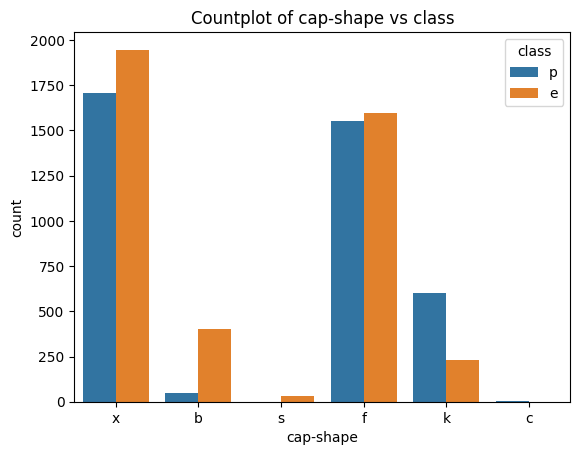

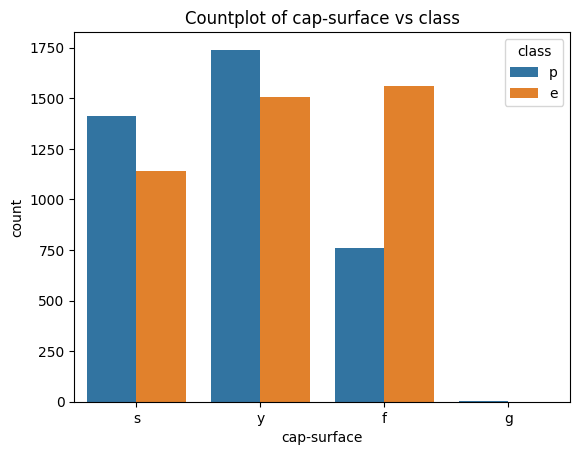

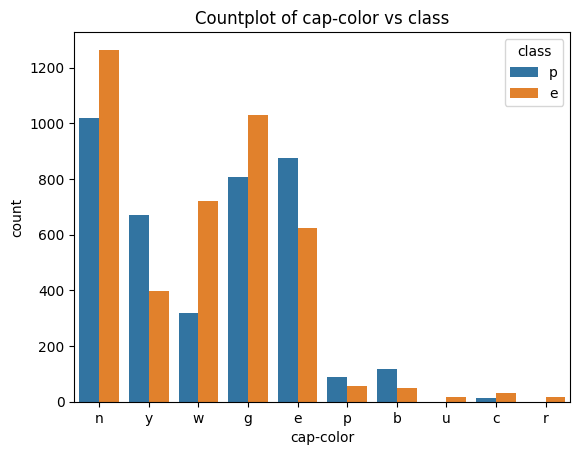

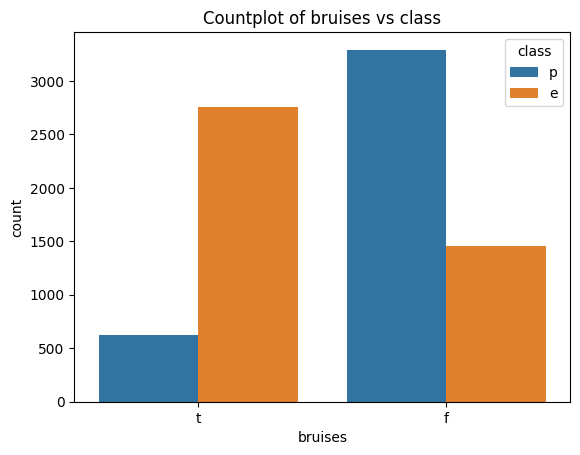

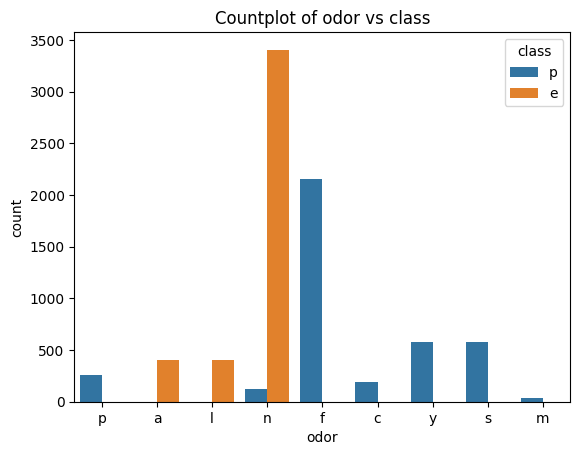

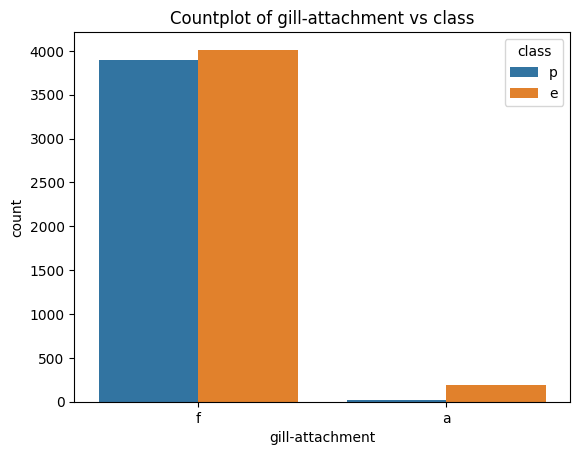

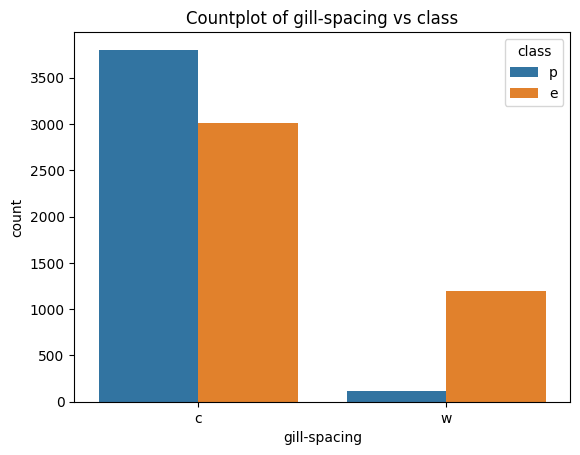

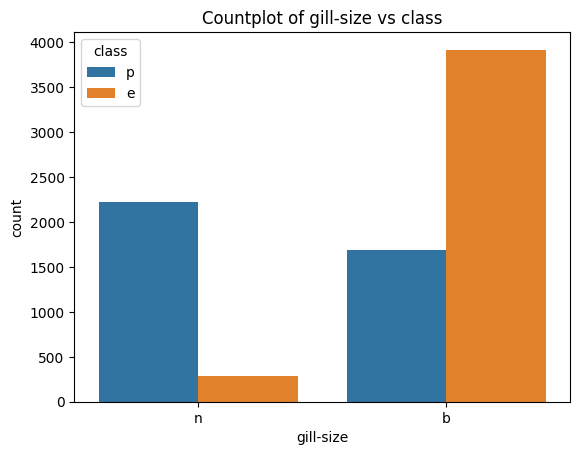

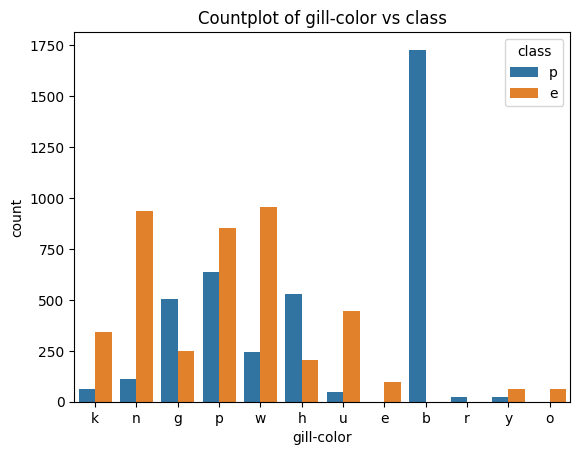

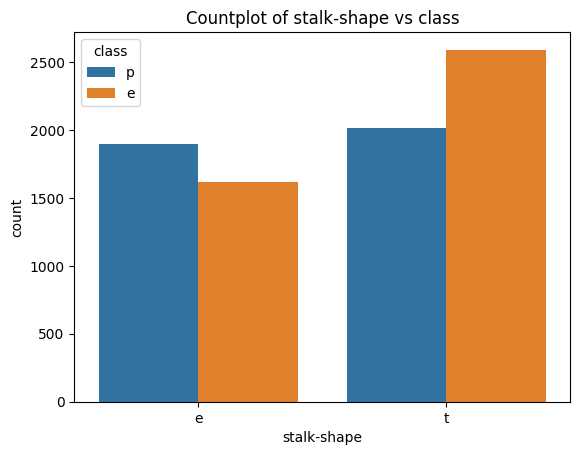

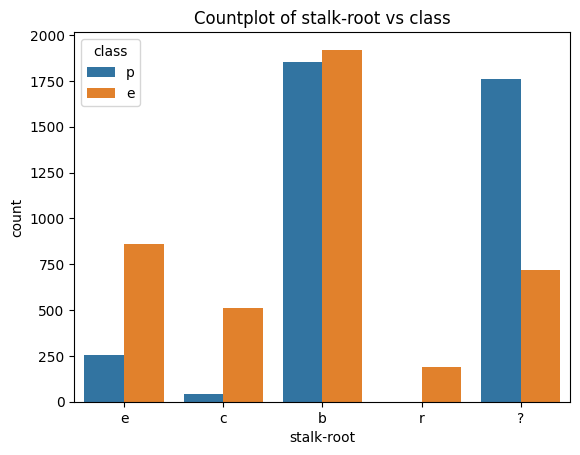

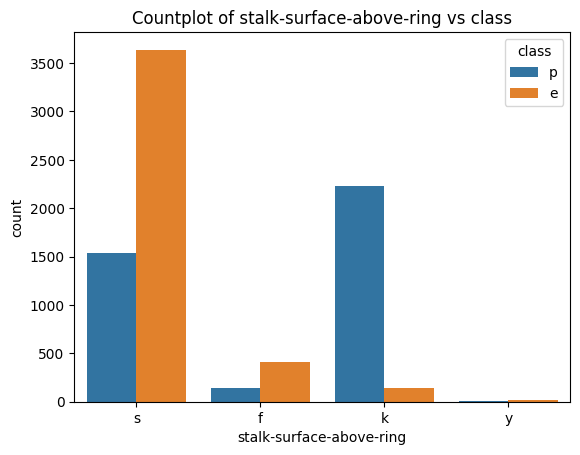

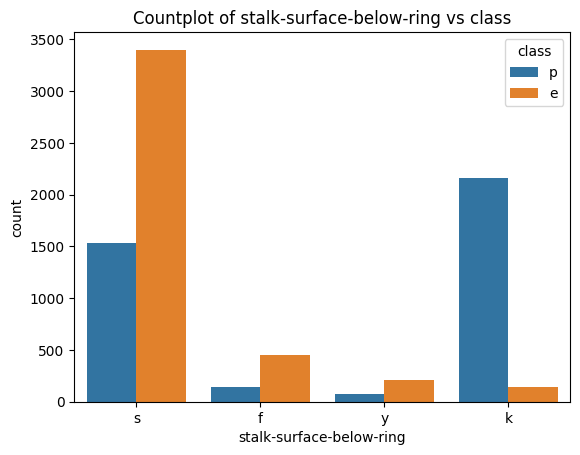

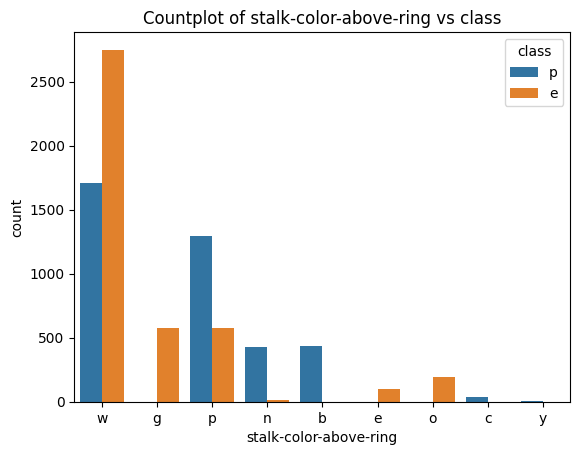

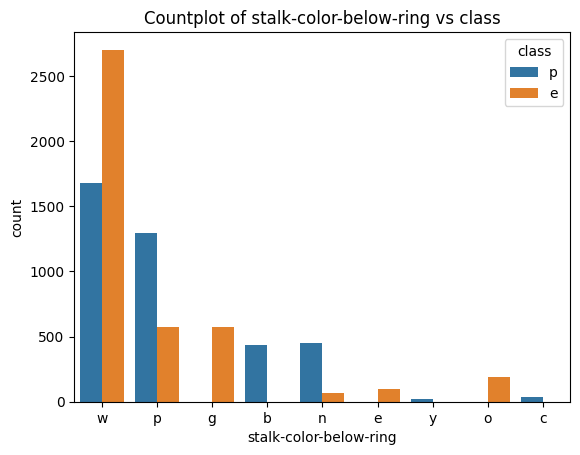

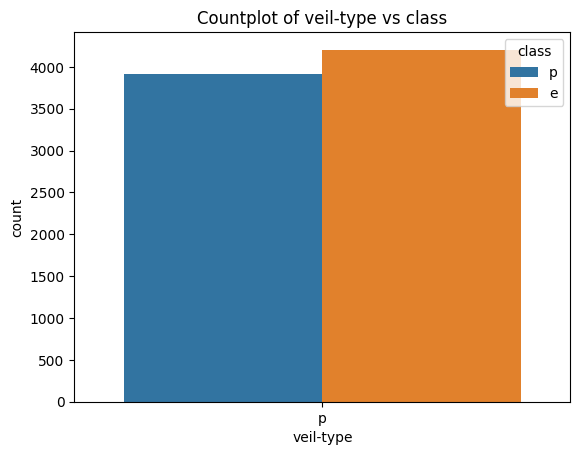

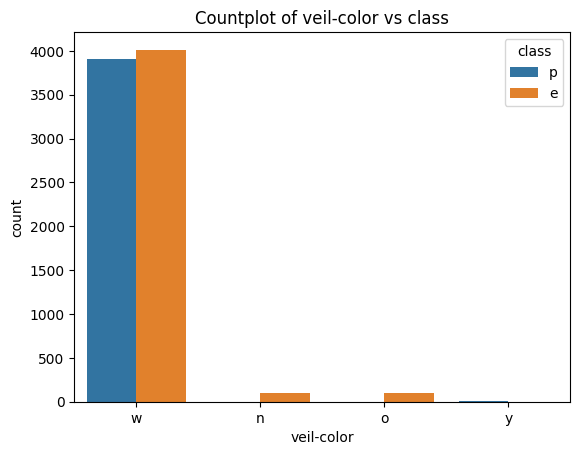

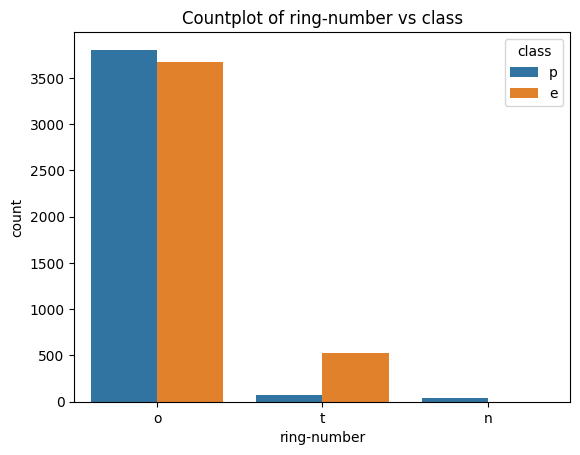

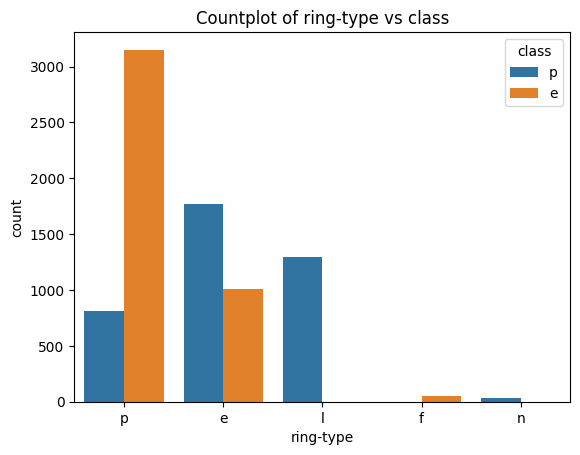

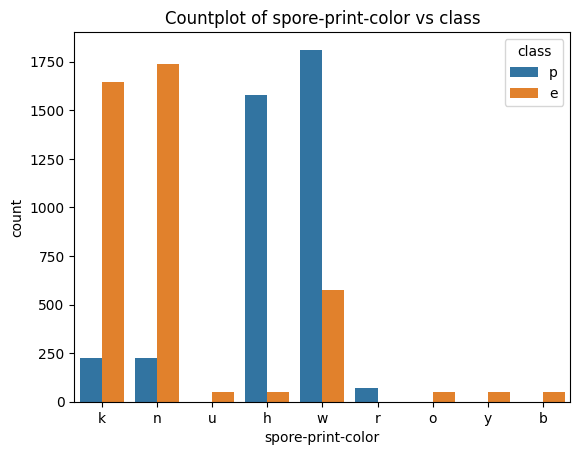

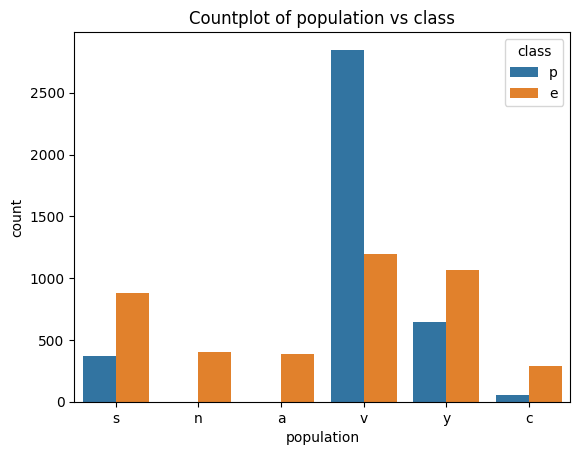

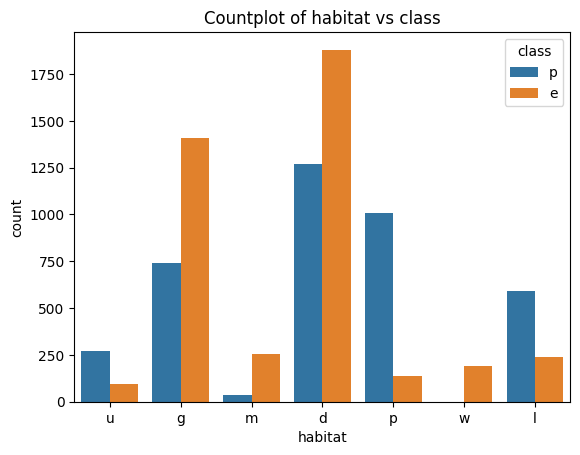

In [219]:
# Scatter plot ile ilişkileri anlama
for i in df.columns[1:]:
    sns.countplot(data=df, x=i, hue='class')
    plt.title(f'Countplot of {i} vs class')
    plt.show()


# sns.pairplot(df, hue='class', diag_kind='kde') 


-> Numrec degiskenler için Güzel özellikler:
 * sns.distplot(df['price']) # o featurenin dağılımını veriyor güzel bir analiz
 * sns.pairplot(df, hue='numeric', diag_kind='kde') 
 * df.corr()
 * df.corr["price"].sort_values()
 * verilerin %100 ü ile çalışmak istemiyorsan %99 uylada çalışabilirsin (13100 veriden 131 tanesini atabilirsin)
 * df.groupy("year").mean()["price"] -> yılları getiriyor ve yıla göre ortalama fiyatları yılın yanına yazarak 2 sutunlu tablo oluşturuyor

# 5) Eksik değer Yapılandırması 

In [220]:
# '?' değerlerini NaN ile değiştir
df.replace('?', np.nan, inplace=True)

In [221]:
# Null değerleri kontrol et
df.isnull().sum()

class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

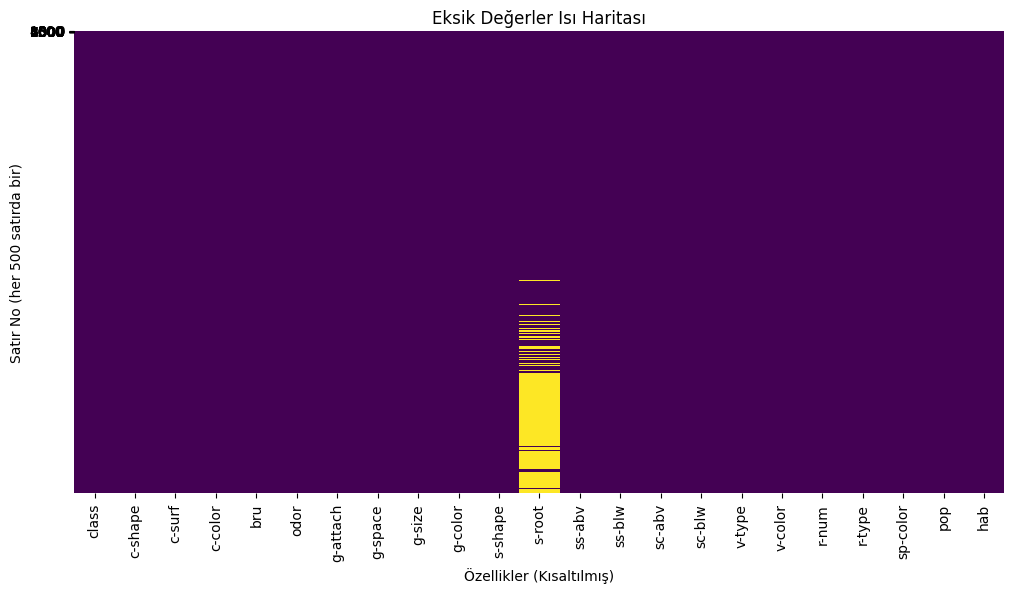

In [222]:

# bunu grafiğe dök
# Sütun adlarını kısalt
short_names = {
    'cap-shape': 'c-shape', 'cap-surface': 'c-surf', 'cap-color': 'c-color',
    'bruises': 'bru', 'odor': 'odor', 'gill-attachment': 'g-attach',
    'gill-spacing': 'g-space', 'gill-size': 'g-size', 'gill-color': 'g-color',
    'stalk-shape': 's-shape', 'stalk-root': 's-root', 'stalk-surface-above-ring': 'ss-abv',
    'stalk-surface-below-ring': 'ss-blw', 'stalk-color-above-ring': 'sc-abv',
    'stalk-color-below-ring': 'sc-blw', 'veil-type': 'v-type', 'veil-color': 'v-color',
    'ring-number': 'r-num', 'ring-type': 'r-type', 'spore-print-color': 'sp-color',
    'population': 'pop', 'habitat': 'hab'
}
df_short = df.rename(columns=short_names)

plt.figure(figsize=(12, 6))
# Her 500. satırı etiket olarak göster (isteğe göre aralığı değiştirebilirsin)
ytick_freq = 500
yticks = list(range(0, df_short.shape[0], ytick_freq))
sns.heatmap(
    df_short.isnull(),
    cbar=False,
    cmap='viridis',
    yticklabels=[str(i) for i in yticks] + [''] if df_short.shape[0] % ytick_freq != 0 else [str(i) for i in yticks]
)
plt.title('Eksik Değerler Isı Haritası')
plt.xlabel('Özellikler (Kısaltılmış)')
plt.ylabel('Satır No (her {} satırda bir)'.format(ytick_freq))
plt.show()

In [223]:
df['stalk-root'].value_counts()

stalk-root
b    3773
e    1118
c     555
r     192
Name: count, dtype: int64

📌 stalk-root Özelliği Özeti:

* Toplam: 8124 veri

* Eksik değer: 2480 (~%30.5 → az değil)

Kategori dağılımı:

- b: 3776 (~46.5%)

- e: 1120 (~13.8%)

- c: 556 (~6.9%)

- r: 192 (~2.4%)



- Eksik verileri doldurmak için doğru yöntem seçilmeli
- Örneğin ortalama ,ortanca, mod yada KNNinputer gibi yöntemler kullanılabilir
- Yaygın olarak eksik numeric verileri doldurmak için KNN imputer kullanılır. (bizim için uygun değil)
- Yaygın olarak eksik Kategorik verileri doldurmak için en sık geçen değer (Mode) kullanılır.
- Ama Biz burda en iyi performans vereceğini düşündüğüm için özellik değerlerinin ağırlıklarına oranla rastgele değerlerle dolduracağız

In [224]:
# Mevcut eksik olmayan değerleri bir diziye alalım
values = df['stalk-root'].dropna().values
# Eksik değer sayısını hesaplayalım
missing_count = df['stalk-root'].isnull().sum()

# Mevcut değerlerden eksik değer sayısı kadar rastgele seçiyoruz
# Bu değerlerin dağılımını koruyarak eksik değerleri dolduracağız
# Rastgele seçim yaparken mevcut değerlerin dağılımını korumak için p parametresini kullanıyoruz.
# replace=True → aynı değer birden fazla seçilebilir
imputed_values = np.random.choice(['b', 'e', 'c', 'r'], size=missing_count, replace=True, p=[0.4, 0.3, 0.2, 0.1])

# Eksik değerleri bu rastgele seçilen değerlerle dolduruyoruz
df.loc[df['stalk-root'].isnull(), 'stalk-root'] = imputed_values

In [225]:
# Null değerleri kontrol et
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

# 6) Outliers Yapılandırması 


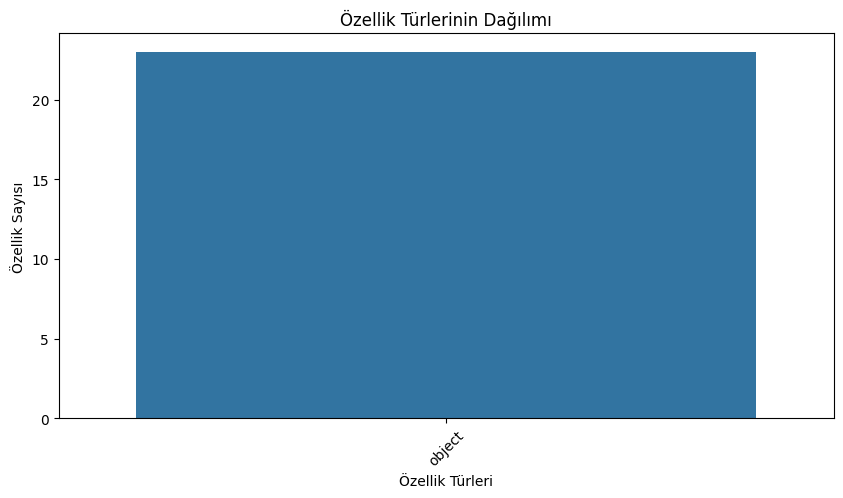

In [226]:
# char int ve string özellikleri saysını grafikte göster
def plot_feature_types(df):
    feature_types = df.dtypes.value_counts()
    plt.figure(figsize=(10, 5))
    sns.barplot(x=feature_types.index.astype(str), y=feature_types.values)
    plt.title('Özellik Türlerinin Dağılımı')
    plt.xlabel('Özellik Türleri')
    plt.ylabel('Özellik Sayısı')
    plt.xticks(rotation=45)
    plt.show() 

plot_feature_types(df)


- Mushroom dataset'inde veriler kategorik olduğu için outlier Yapılandırmasına gerek yok
- Eğer yapmak isteydik boxplot çizdirerek aykırı değerleri tespit edebilirdik

# 7) Tekrar Eden ve İşeyaramaz verilerin Yapılandırması

In [227]:
# Çift değerleri kontrol et
df.duplicated().sum()
#Çıktı:
# 0

np.int64(0)

# 8) Data Encoding
 

📌 Class Sütünu

- Binary target (e / p) → yani 2 sınıflı bir hedef değişken
- 📌 Label Encoding en doğru ve standart yöntemdir.
- ✅ class → Label Encoding

📌 Diğer Sütünlar

- 🍄 cap-shape → bell, conical, convex, flat, knobbed, sunken
- ✅ Sırasız → One-hot

- 🍄 cap-surface → fibrous, grooves, scaly, smooth
- ✅ Sırasız → One-hot

- 🍄 cap-color → brown, buff, cinnamon, gray, green, pink, purple, red, white, yellow
- ✅ Sırasız renkler → One-hot

- 🍄 bruises? → bruises, no
- 📌 Binary ama herhangi bir sıralama yok, burada

- DL modeline direkt Label encoding verilebilir (0/1)

- Ama modelin katmanlarında bias yaratmaması için One-hot encoding tercih edilir
- ✅ Yani burada One-hot encoding

- 🍄 odor → almond, anise, creosote, fishy, foul, musty, none, pungent, spicy
- ✅ Sırasız → One-hot

- 🍄 gill-attachment → attached, descending, free, notched
- ✅ Sırasız → One-hot

- 🍄 gill-spacing → close, crowded, distant
- ✅ Sıralı gibi durabilir (crowded < close < distant?) ama veri sözlüğünde böyle bir bilgi yok, sıralama anlamı yok → One-hot

- 🍄 gill-size → broad, narrow
- 📌 Binary ama sıralama var mı?
- B → geniş N → dar
- Belki sıralı sayılabilir ama çoğu DL uygulamasında One-hot encoding tercih edilir
- ✅ Yine One-hot

- 🍄 gill-color → renkler
- ✅ Sırasız → One-hot

- 🍄 stalk-shape → enlarging, tapering
- 📌 2 değerli ama sıralı değil
- ✅ One-hot

- 🍄 stalk-root → bulbous, club, cup, equal, rhizomorphs, rooted, missing
- ✅ Sırasız → One-hot

- 🍄 stalk-surface-above-ring → fibrous, scaly, silky, smooth
- ✅ Sırasız → One-hot

- 🍄 stalk-surface-below-ring → aynı → One-hot
- 🍄 stalk-color-above-ring → renkler
- ✅ Sırasız → One-hot

- 🍄 stalk-color-below-ring → aynı → One-hot
- 🍄 veil-type → partial, universal
- 📌 Binary ama veri dağılımında genelde hep aynı olabilir (kontrol et)
- Eğer tek tip değilse → One-hot

- 🍄 veil-color → renkler
- ✅ Sırasız → One-hot

- 🍄 ring-number → none, one, two
- ✅ Aslında sayı sırası var ama kategorik değer olduğu için ve DL modelde bias yaratmaması için One-hot encoding

- 🍄 ring-type → cobwebby, evanescent, flaring, large, none, pendant, sheathing, zone
- ✅ Sırasız → One-hot

- 🍄 spore-print-color → renkler
- ✅ Sırasız → One-hot

- 🍄 population → abundant, clustered, numerous, scattered, several, solitary
- ✅ Sırasız → One-hot

- 🍄 habitat → grasses, leaves, meadows, paths, urban, waste, woods
- ✅ Sırasız → One-hot


In [228]:
df['veil-type'].value_counts()

veil-type
p    8118
Name: count, dtype: int64

* 'veil-type' özelliği sadece p değeri içeriyor
* Bu özellik Modele katkı sağlamayacağı için çıkarılmıştır

In [229]:
# 'veil-type' sütununu kaldırıyoruz çünkü sadece tek bir değere sahip
df.drop(columns=['veil-type'], inplace=True)

In [230]:
# Sütun isimlerini kontrol et
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

* df = Encode edilmemiş, Null değerleri dolduruş, 'veil-type' özelliği çıkarılmış data

In [231]:
# Class sütunu için Label Encoding
le = LabelEncoder()
# kopy alıyoruz çünkü orijinal veri setini değiştirmek istemiyoruz
df_encoded = df.copy()
# 'class' sütununu label encoding ile sayısal değerlere dönüştürüyoruz
df_encoded['class'] = le.fit_transform(df['class'])

In [232]:
# One-hot encoding uygulanacak sütunlar (class hariç tüm kategorik sütunlar)
one_hot_cols = [
    'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment',
    'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root',
    'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring',
    'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
    'spore-print-color', 'population', 'habitat'
]

# One-hot encoding
df_encoded = pd.get_dummies(df_encoded, columns=one_hot_cols)


* df_encoded = Encode edilmiş, Null değerleri dolduruş, 'veil-type' özelliği çıkarılmış data

In [233]:
df_encoded.info()
# One-hot encoding sonrası veri setinin boyutunu kontrol et
# Çıktı:
# RangeIndex: 8124 entries, 0 to 8123
# Data columns (total 119 columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8118 entries, 0 to 8117
Columns: 116 entries, class to habitat_w
dtypes: bool(115), int64(1)
memory usage: 975.2 KB


In [234]:
df_encoded.head()
# One-hot encoding sonrası veri setinin ilk 5 satırını göster

,class,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,False,False,False,False,False,True,False,False,True,...,True,False,False,False,False,False,False,False,True,False
1,0,False,False,False,False,False,True,False,False,True,...,False,False,False,False,True,False,False,False,False,False
2,0,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
3,1,False,False,False,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,True,False
4,0,False,False,False,False,False,True,False,False,True,...,False,False,False,False,True,False,False,False,False,False


In [235]:
df_encoded.shape
# Çıktı:
# (8124, 119)

(8118, 116)

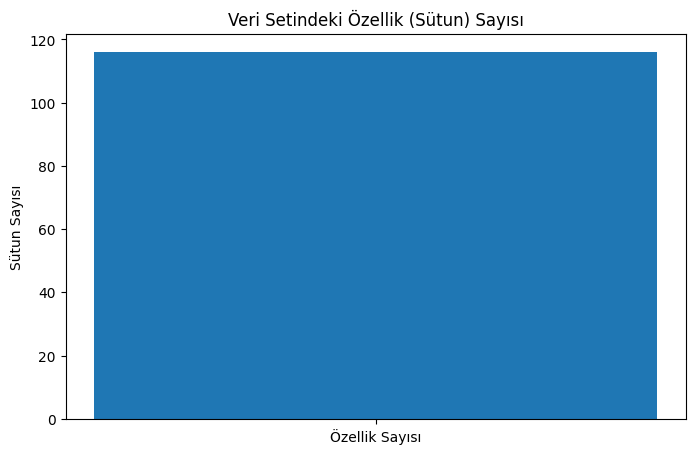

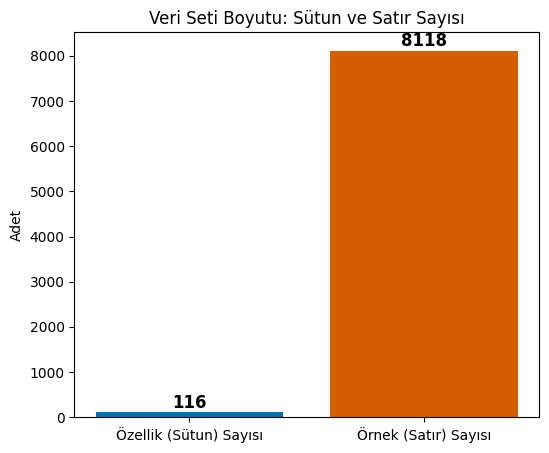

In [236]:
#df_encoded shape için grafik
plt.figure(figsize=(8, 5))
plt.bar(['Özellik Sayısı'], [df_encoded.shape[1]])
plt.title('Veri Setindeki Özellik (Sütun) Sayısı')
plt.xlabel(' ')
plt.ylabel('Sütun Sayısı')
plt.figure(figsize=(6, 5))
plt.bar(['Özellik (Sütun) Sayısı', 'Örnek (Satır) Sayısı'], [df_encoded.shape[1], df_encoded.shape[0]], color=['#0072B2', '#D55E00'])
plt.title('Veri Seti Boyutu: Sütun ve Satır Sayısı')
plt.ylabel('Adet')
for i, v in enumerate([df_encoded.shape[1], df_encoded.shape[0]]):
    plt.text(i, v + 100, str(v), ha='center', fontweight='bold', fontsize=12)
plt.show()
plt.show()


# 9) Deep Learning ile Model Eğitimi

In [237]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, GaussianNoise
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import KFold



In [238]:
y = df_encoded["class"].values
x = df_encoded.drop(columns=["class"]).values

In [239]:
y

array([1, 0, 0, ..., 0, 1, 0])

In [240]:
x

array([[False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       ...,
       [False, False,  True, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [241]:
# Modeli train ve test setine ayır
# x ve y'yi %70 train %30 test setine ayırıyoruz (yaygın kullanım)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
 

In [242]:
# Ayrılan veri setlerinin boyutlarını kontrol et
len(x_train), len(x_test), len(y_train), len(y_test)

(5682, 2436, 5682, 2436)

In [243]:
scaler = MinMaxScaler()
# Veriyi ölçeklendir
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [244]:
x_train.shape

(5682, 115)

* Cross validation 

In [245]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Sonuçları tutmak için listeler
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_index, val_index in kf.split(x):
    x_train_fold, x_val_fold = x[train_index], x[val_index]
    y_train_fold, y_val_fold = y[train_index], y[val_index]
    
    # Ölçekleme (her fold için yeniden fit)
    scaler_fold = MinMaxScaler()
    x_train_fold = scaler_fold.fit_transform(x_train_fold)
    x_val_fold = scaler_fold.transform(x_val_fold)
    
    # Modeli oluştur
    model_fold = Sequential() 
    # 1. İlk (Giriş) Katmanları
    # relu aktivasyon fonksiyonu, doğrusal olmayan ilişkileri öğrenmeyi sağlar
    # 115 nöron, ReLU aktivasyon fonksiyonu, giriş şekli x_train'in boyutu
    # BatchNormalization ve Dropout katmanları ekleriz

    # GaussianNoise: Modelin girişine gürültü ekler, aşırı öğrenmeyi önler
    model_fold.add(GaussianNoise(0.1, input_shape=(x_train_fold.shape[1],)))


    model_fold.add(Dense(115, activation='relu'))
    #BatchNormalization(): 
    # Eğitim sırasında katman çıktısını normalize eder,öğrenmeyi hızlandırır ve daha stabil hale getirir.
    model_fold.add(BatchNormalization())
    
    # Dropout: Aşırı öğrenmeyi önlemek için rastgele nöronları kapatır
    model_fold.add(Dropout(0.3))
    
    # 2. Orta (Gizli) Katmanlar
    # 64 nöron, ReLU aktivasyon fonksiyonu
    model_fold.add(Dense(55, activation='relu'))
    model_fold.add(BatchNormalization())
    model_fold.add(Dropout(0.3))

    # 3. Çıkış Katmanı
    # 1 nöron, sigmoid aktivasyon fonksiyonu (binary classification için)
    # Sigmoid aktivasyon fonksiyonu, binary classification için uygundur
    model_fold.add(Dense(1, activation='sigmoid')) 

    # Binary classification için modelimizi derliyoruz
    # Binary classification için binary_crossentropy kaybı kullanılır
    model_fold.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])
    
    # Erken durdurma
    # Erken durdurma, validation loss izlenerek modelin aşırı öğrenmesini önler

    early_stop_fold = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=0)
    
    # Modeli eğit
    # Modeli eğitirken validation setini de kullanıyoruz

    model_fold.fit(
        x_train_fold, y_train_fold,
        validation_data=(x_val_fold, y_val_fold),
        epochs=50,
        batch_size=32,
        callbacks=[early_stop_fold],
        verbose=0
    )
    
    # Tahmin ve skorlar
    # Validation seti üzerinde tahmin yapıyoruz
    # Tahminlerimizi binary sınıflara dönüştürüyoruz (0 ve 1)
    # accuracy, precision, recall ve f1 skorlarını hesaplıyoruz
    y_pred_fold = (model_fold.predict(x_val_fold) > 0.5).astype(int)
    accuracy_scores.append(accuracy_score(y_val_fold, y_pred_fold))
    precision_scores.append(precision_score(y_val_fold, y_pred_fold))
    recall_scores.append(recall_score(y_val_fold, y_pred_fold))
    f1_scores.append(f1_score(y_val_fold, y_pred_fold))

# Sonuçları yazdır
print("\nK-Fold Sonuçları (5 Fold):")
print("Ortalama Accuracy :", np.mean(accuracy_scores))
print("Ortalama Precision:", np.mean(precision_scores))
print("Ortalama Recall   :", np.mean(recall_scores))
print("Ortalama F1 Score :", np.mean(f1_scores))

c:\Users\gelis\Desktop\Bilgisayar Mühendisliği\Sınıf-3\Bahar\Veri Madenciliği\odev2\.venv-tf\lib\site-packages\keras\src\layers\regularization\gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


c:\Users\gelis\Desktop\Bilgisayar Mühendisliği\Sınıf-3\Bahar\Veri Madenciliği\odev2\.venv-tf\lib\site-packages\keras\src\layers\regularization\gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


c:\Users\gelis\Desktop\Bilgisayar Mühendisliği\Sınıf-3\Bahar\Veri Madenciliği\odev2\.venv-tf\lib\site-packages\keras\src\layers\regularization\gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


c:\Users\gelis\Desktop\Bilgisayar Mühendisliği\Sınıf-3\Bahar\Veri Madenciliği\odev2\.venv-tf\lib\site-packages\keras\src\layers\regularization\gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\gelis\Desktop\Bilgisayar Mühendisliği\Sınıf-3\Bahar\Veri Madenciliği\odev2\.venv-tf\lib\site-packages\keras\src\layers\regularization\gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

K-Fold Sonuçları (5 Fold):
Ortalama Accuracy : 1.0
Ortalama Precision: 1.0
Ortalama Recall   : 1.0
Ortalama F1 Score : 1.0


* Cross-validation sonuçlarını görselleştirme

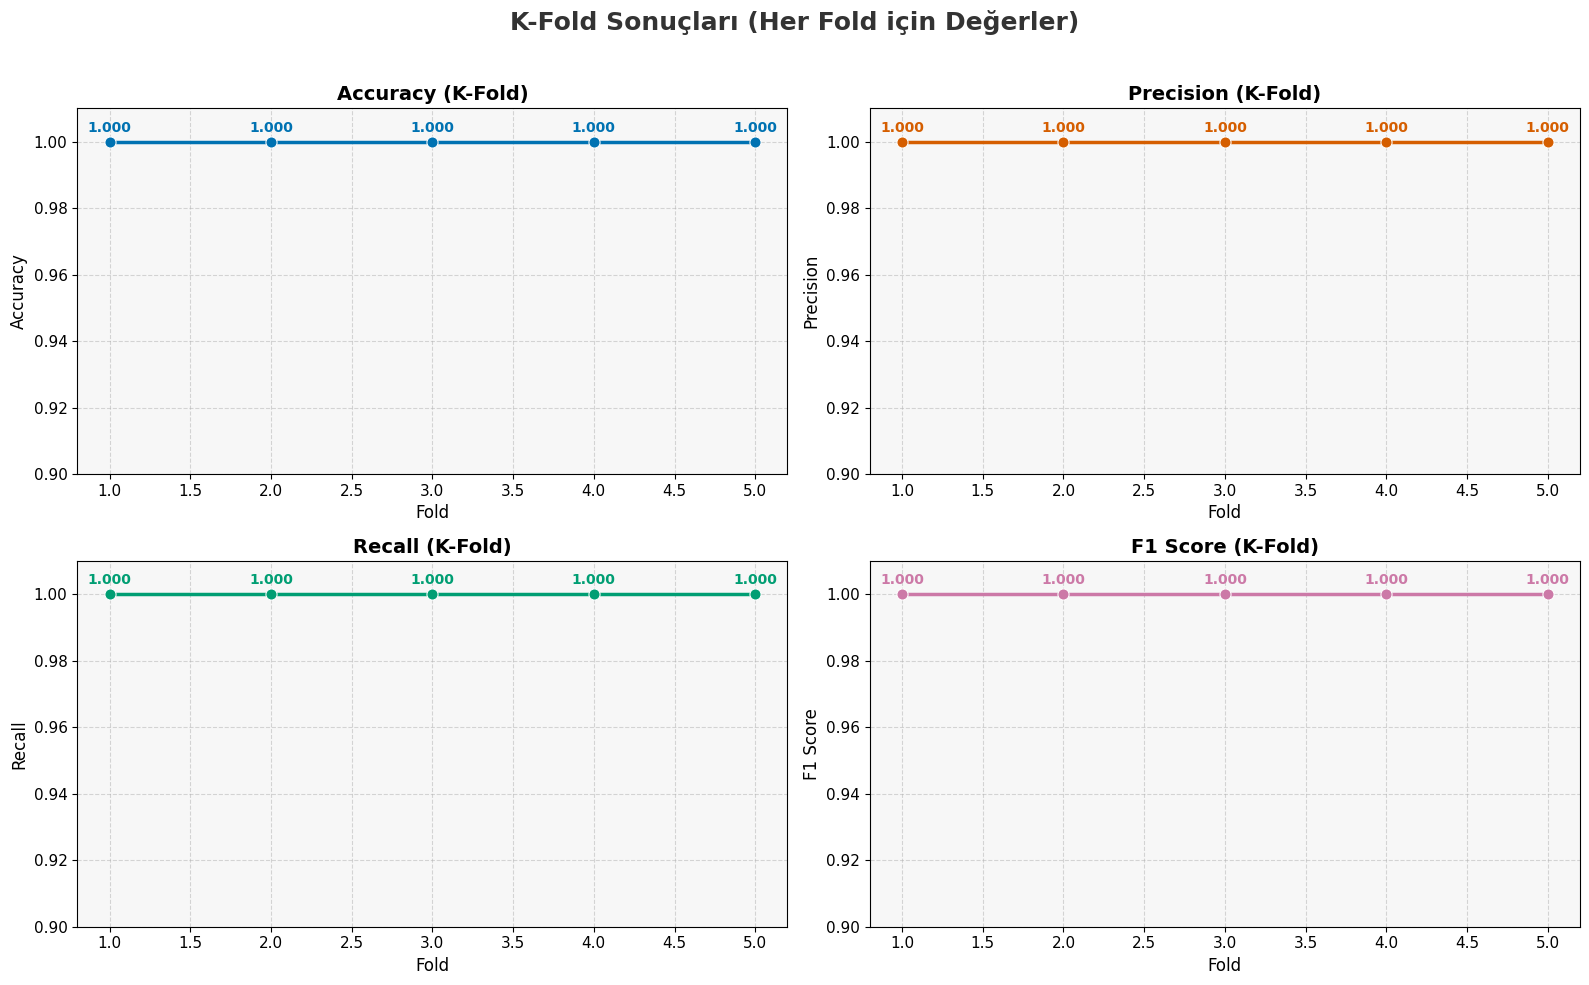

In [255]:
import matplotlib.ticker as mticker

# Cross-validation sonrası skorları DataFrame'e aktar
results_df = pd.DataFrame({
    'Fold': np.arange(1, 6),
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores
})

palette = ['#0072B2', '#D55E00', '#009E73', '#CC79A7']  # Farklı renkler
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
plt.figure(figsize=(16, 10))
plt.suptitle("K-Fold Sonuçları (Her Fold için Değerler)", fontsize=18, fontweight='bold', color='#333333')

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    ax = sns.lineplot(
        data=results_df, x='Fold', y=metric, marker='o', color=palette[i-1], linewidth=2.5, markersize=8
    )
    plt.title(f"{metric} (K-Fold)", fontsize=14, fontweight='bold')
    plt.ylim(0.9, 1.01)
    plt.xlabel("Fold", fontsize=12)
    plt.ylabel(metric, fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.gca().set_facecolor('#f7f7f7')
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11)
    # Her noktaya değer etiketi ekle
    for x, y in zip(results_df['Fold'], results_df[metric]):
        plt.text(x, y+0.002, f"{y:.3f}", ha='center', va='bottom', fontsize=10, color=palette[i-1], fontweight='bold')
    # Y eksenini 2 ondalık göster
    ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.2f'))

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



In [247]:
#Grafik Yorumu (K-Fold Sonuçları):
# 1. **Genel Performans**: Her dört metrik de (Accuracy, Precision, Recall, F1 Score) 0.90 ile 1.00 arasında değişiyor, bu da modelin genel olarak yüksek performans gösterdiğini gösteriyor.
# 2. **Stabilite**: Her fold için metrikler oldukça benzer, bu da modelin farklı veri bölümlerinde tutarlı bir şekilde performans gösterdiğini gösteriyor.
# 3. **F1 Skor**: F1 skoru, Precision ve Recall'un harmonik ortalamasıdır. Bu metrik, modelin hem yanlış pozitifleri hem de yanlış negatifleri minimize etme yeteneğini gösterir. F1 skoru da oldukça yüksek.
# 4. **Precision ve Recall**: Precision, modelin doğru pozitif tahminlerinin toplam pozitif tahminlere oranını gösterirken, Recall, modelin doğru pozitif tahminlerinin toplam gerçek pozitiflere oranını gösterir. Her iki metrik de yüksek, bu da modelin hem doğru tahmin yapma hem de gerçek pozitifleri yakalama yeteneğinin iyi olduğunu gösteriyor.

*  Confusion Matrix (Karışıklık Matrisi)

77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1309
           1       1.00      1.00      1.00      1127

    accuracy                           1.00      2436
   macro avg       1.00      1.00      1.00      2436
weighted avg       1.00      1.00      1.00      2436



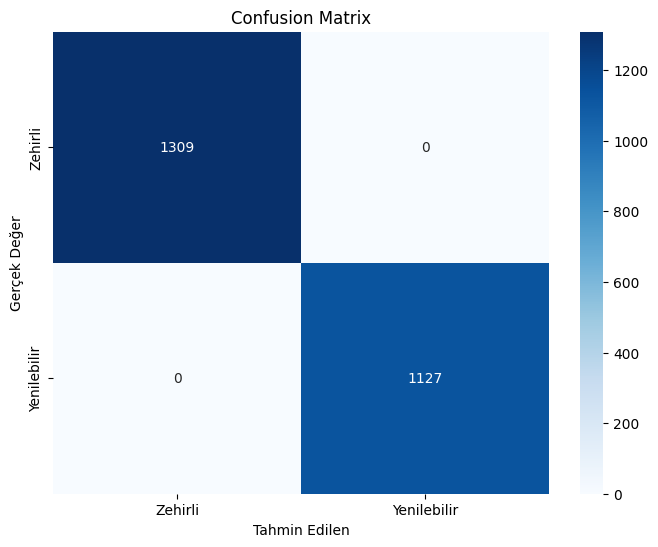

In [248]:
# Sınıflandırma raporu
y_pred = (model_fold.predict(x_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))

# Karışıklık matrisi
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Zehirli', 'Yenilebilir'], yticklabels=['Zehirli', 'Yenilebilir'])
plt.title('Confusion Matrix')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek Değer')
plt.show()

In [249]:
#Grafik Yorumu (Confusion Matris):
# Confusion matrisi, modelin tahminlerinin gerçek değerlerle nasıl karşılaştığını gösterir.
# Matrisin köşegenindeki değerler doğru tahminleri, diğer değerler ise yanlış tahminleri gösterir.

* ROC Curve (Alıcı Çalışma Karakteristik Eğrisi)

77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step   


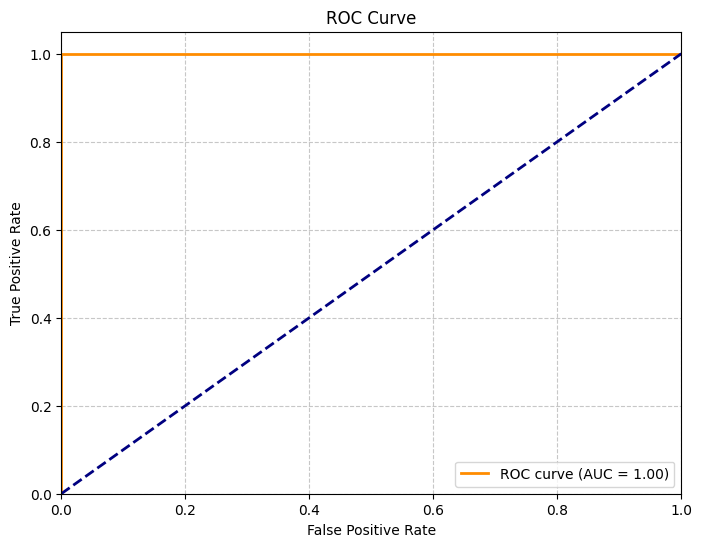

In [250]:


from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Olasılık tahminleri alınmalı!
y_pred_proba = model_fold.predict(x_test)

# ROC curve için değerler
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# ROC grafiği
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [251]:
#Grafik Yorumu (ROC Eğrisi):
# ROC eğrisi, modelin sınıflandırma performansını gösterir.
# Eğrinin altında kalan alan (AUC), modelin genel başarısını ölçer.
# AUC değeri 0.5 ile 1 arasında değişir.
# 0.5, rastgele tahminleri temsil ederken, 1.0 mükemmel bir modeli temsil eder.


* Ana Model ile Eğitim ve değerledirme (Cross-validation olmadan)

In [252]:
# Modeli oluştur
model = Sequential()
# 1. İlk (Giriş) Katmanları
# relu aktivasyon fonksiyonu, doğrusal olmayan ilişkileri öğrenmeyi sağlar
# 115 nöron, ReLU aktivasyon fonksiyonu, giriş şekli x_train'in boyutu
# BatchNormalization ve Dropout katmanları ekleriz
model.add(GaussianNoise(0.1, input_shape=(x_train.shape[1],)))  # 0.1: noise std
model.add(Dense(115, activation='relu'))
#BatchNormalization(): 
# Eğitim sırasında katman çıktısını normalize eder,öğrenmeyi hızlandırır ve daha stabil hale getirir.
model.add(BatchNormalization())
# Dropout: Aşırı öğrenmeyi önlemek için rastgele nöronları kapatır
model.add(Dropout(0.3))

# 2. Orta (Gizli) Katmanlar
# 64 nöron, ReLU aktivasyon fonksiyonu
model.add(Dense(55, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))


# 3. Çıkış Katmanı
# 1 nöron, sigmoid aktivasyon fonksiyonu (binary classification için)
model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Derleme
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# Erken durdurma
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Eğitme
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/50


c:\Users\gelis\Desktop\Bilgisayar Mühendisliği\Sınıf-3\Bahar\Veri Madenciliği\odev2\.venv-tf\lib\site-packages\keras\src\layers\regularization\gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


178/178 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8751 - loss: 0.2750 - precision: 0.8634 - recall: 0.8793 - val_accuracy: 0.9955 - val_loss: 0.0704 - val_precision: 0.9921 - val_recall: 0.9982
Epoch 2/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9912 - loss: 0.0292 - precision: 0.9904 - recall: 0.9920 - val_accuracy: 0.9996 - val_loss: 0.0061 - val_precision: 1.0000 - val_recall: 0.9991
Epoch 3/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9940 - loss: 0.0195 - precision: 0.9949 - recall: 0.9928 - val_accuracy: 1.0000 - val_loss: 0.0016 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 4/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9982 - loss: 0.0114 - precision: 0.9991 - recall: 0.9973 - val_accuracy: 1.0000 - val_loss: 4.5108e-04 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 5/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9975 - loss: 0.0095 - precision: 0.9983 - recall: 0.9966 - val_accuracy: 1.0000 - val_loss: 2.0401e-0

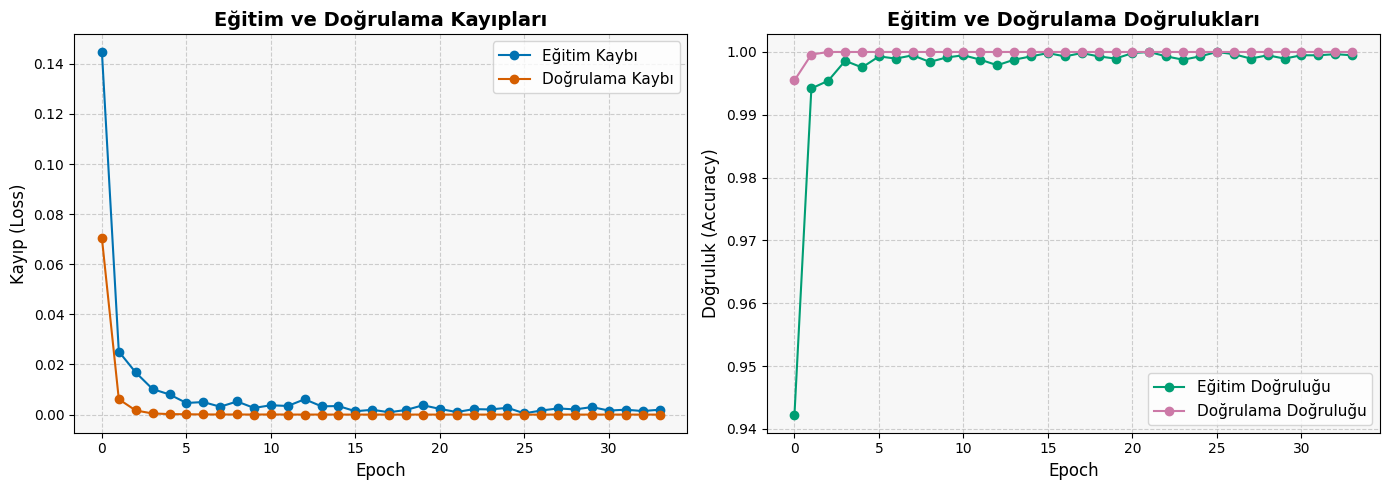

In [253]:
# Eğitim ve doğrulama kaybı ve doğruluğunu görselleştirme

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Kayıp (Loss) grafiği
axs[0].plot(history.history['loss'], label='Eğitim Kaybı', marker='o', color='#0072B2')
axs[0].plot(history.history['val_loss'], label='Doğrulama Kaybı', marker='o', color='#D55E00')
axs[0].set_xlabel('Epoch', fontsize=12)
axs[0].set_ylabel('Kayıp (Loss)', fontsize=12)
axs[0].set_title('Eğitim ve Doğrulama Kayıpları', fontsize=14, fontweight='bold')
axs[0].legend(fontsize=11)
axs[0].grid(True, linestyle='--', alpha=0.6)
axs[0].set_facecolor('#f7f7f7')

# Doğruluk (Accuracy) grafiği
axs[1].plot(history.history['accuracy'], label='Eğitim Doğruluğu', marker='o', color='#009E73')
axs[1].plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu', marker='o', color='#CC79A7')
axs[1].set_xlabel('Epoch', fontsize=12)
axs[1].set_ylabel('Doğruluk (Accuracy)', fontsize=12)
axs[1].set_title('Eğitim ve Doğrulama Doğrulukları', fontsize=14, fontweight='bold')
axs[1].legend(fontsize=11)
axs[1].grid(True, linestyle='--', alpha=0.6)
axs[1].set_facecolor('#f7f7f7')

plt.tight_layout()
plt.show()

In [254]:
#Grafik yorumu (Eğitim ve Doğrulama Kayıpları ve Doğrulukları):
# Eğitim ve doğrulama kaybı (loss) grafiğinde, eğitim kaybının zamanla azaldığını ve doğrulama kaybının da benzer şekilde azaldığını görüyoruz.
# Bu, modelin hem eğitim hem de doğrulama setlerinde iyi bir şekilde öğrenme gerçekleştirdiğini gösteriyor.
# Eğitim kaybı genellikle doğrulama kaybından daha düşük olur, bu da modelin eğitim verisine iyi uyum sağladığını gösterir.
# Eğitim ve doğrulama doğruluğu (accuracy) grafiğinde, eğitim doğruluğunun zamanla arttığını ve doğrulama doğruluğunun da benzer şekilde arttığını görüyoruz.
# Bu, modelin hem eğitim hem de doğrulama setlerinde iyi bir performans gösterdiğini gösteriyor.

